In [242]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

sns.set(color_codes=True)

In [243]:
df = pd.read_csv('groceries.csv', header=None)

### Top 5 Rows

In [244]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Number of All Products

In [245]:
from functools import reduce

unique_products = [e for e in set(reduce(
  lambda x, y: list(x) + list(y),
  df.apply(lambda col: col.unique()),
  [],
)) if str(e) != 'nan']
print(len(unique_products))


169


In [246]:
data = [
  [1 if product in row else 0 for product in unique_products]
  for row in df.values
]

In [247]:
matrix_df = pd.DataFrame(data=data, columns=unique_products)

### Most Sold Products

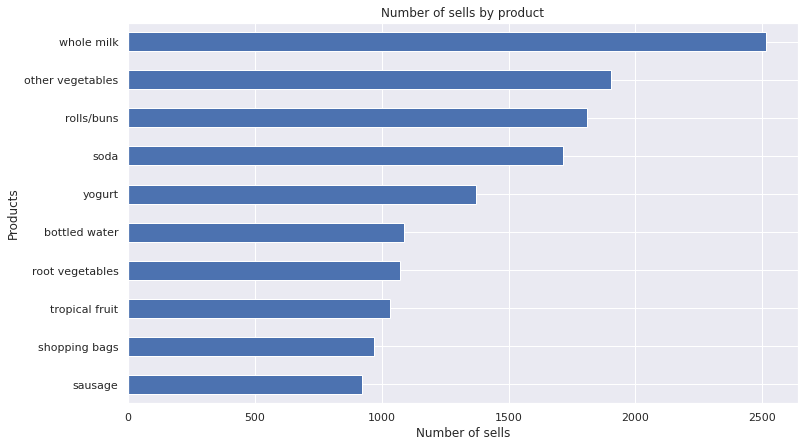

In [248]:
(matrix_df
 .apply(lambda col: col.sum())
 .sort_values()
 .tail(10)
 .plot(kind='barh', figsize=(12, 7)))
plt.title("Number of sells by product")
plt.ylabel('Products')
plt.xlabel('Number of sells');

### Number of Product Sells
Almost 11% of the products, make 50% of the sales (by number, not price)

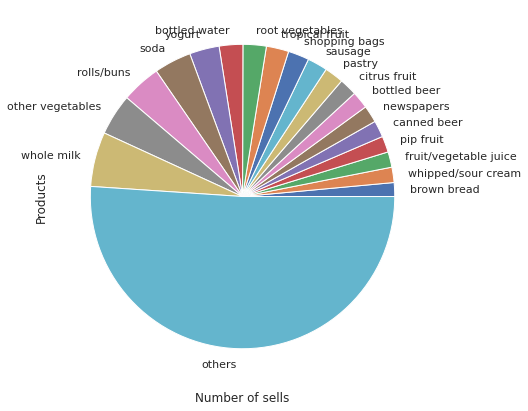

In [387]:
most_sold_products = (
  matrix_df
  .apply(lambda col: col.sum())
  .sort_values()
)

number_of_most_sold_products = 19
result = most_sold_products.tail(number_of_most_sold_products)
result.loc['others'] = sum(most_sold_products[:-number_of_most_sold_products])
result.plot(kind='pie', figsize=(12, 7))
plt.ylabel('Products')
plt.xlabel('Number of sells');

#### Most Sold Products (in %)

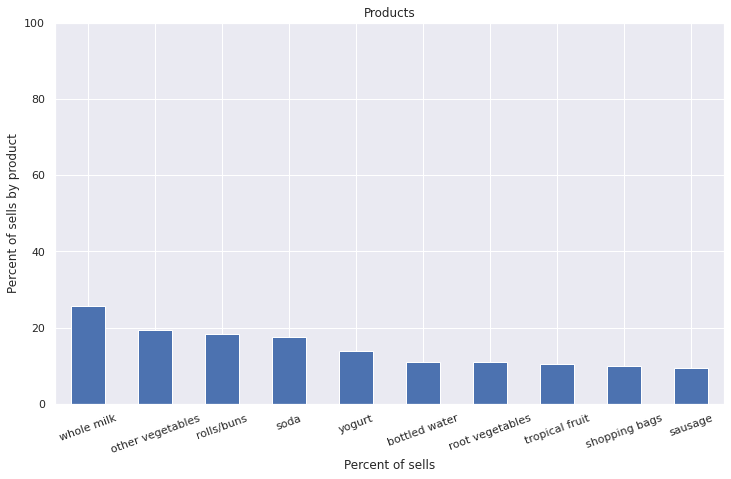

In [249]:
((matrix_df.apply(lambda col: col.sum()) * 100 / matrix_df.count())
 .sort_values(ascending=False)
 .head(10)
 .plot(kind='bar', figsize=(12, 7), ylim=[0,100], rot=20))
plt.title("Products")
plt.ylabel('Percent of sells by product')
plt.xlabel('Percent of sells');

### Least Sold Products

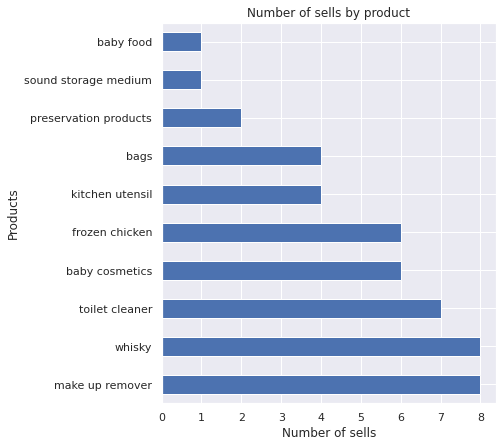

In [250]:
(matrix_df
 .apply(lambda col: col.sum())
 .sort_values(ascending=False)
 .tail(10)
 .plot(kind='barh', figsize=(6, 7)))
plt.title("Number of sells by product")
plt.ylabel('Products')
plt.xlabel('Number of sells');

#### Least Sold Products (in %)

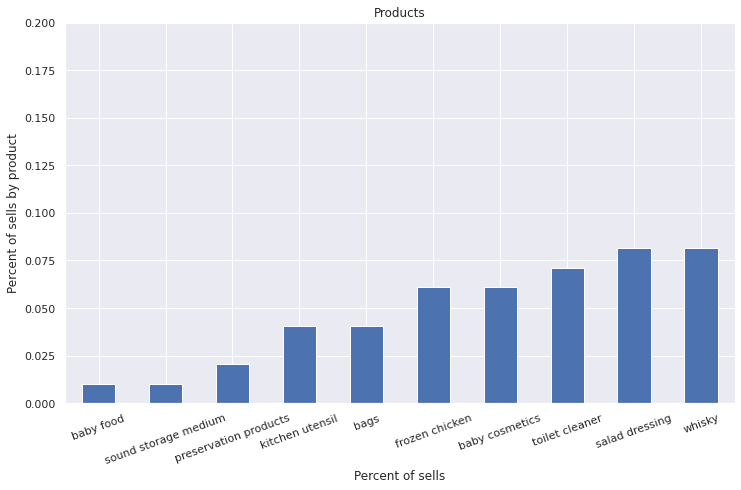

In [251]:
((matrix_df.apply(lambda col: col.sum()) * 100 / matrix_df.count())
 .sort_values()
 .head(10)
 .plot(kind='bar', figsize=(12, 7), ylim=[0,0.2], rot=20))
plt.title("Products")
plt.ylabel('Percent of sells by product')
plt.xlabel('Percent of sells');

### Most Repeated Shopping Carts (Removed zero columns)
It's better to keep these products close to the entrance door.

Product "whole milk" is not the first one in most repeated carts, compared with previous charts.

In [344]:
repeated_carts = (
  matrix_df.groupby(matrix_df.columns.tolist(), as_index=False)
  .size()
  .sort_values(by='size', ascending=False)
)

first_repeated_carts = repeated_carts.head(19)
first_repeated_carts = first_repeated_carts.loc[:, (first_repeated_carts != 0).any(axis=0)]
first_repeated_carts

,yogurt,photo/film,shopping bags,chocolate,other vegetables,soda,pork,canned beer,whole milk,coffee,bottled beer,rolls/buns,pastry,newspapers,ice cream,bottled water,pip fruit,misc. beverages,salty snack,size
1320,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,260
1811,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,156
965,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,121
450,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,120
330,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,109
61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,67
2746,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62
163,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,54
3704,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48
4761,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40


#### Number of Products in each Repeated Cart
All the most repeated carts include just a single product.

In [294]:
first_repeated_carts.drop(columns=['size']).sum(axis=1)

1320    1
1811    1
965     1
450     1
330     1
61      1
2746    1
163     1
3704    1
4761    1
496     1
286     1
3501    1
120     1
24      1
13      1
30      1
1715    1
4319    1
dtype: int64

#### Sum of Products in All Repeated Carts
Most repeated carts, have not any similar products inside them.

In [388]:
first_repeated_carts.drop(columns=['size']).sum(axis=0)



yogurt              1
photo/film          1
shopping bags       1
chocolate           1
other vegetables    1
soda                1
pork                1
canned beer         1
whole milk          1
coffee              1
bottled beer        1
rolls/buns          1
pastry              1
newspapers          1
ice cream           1
bottled water       1
pip fruit           1
misc. beverages     1
salty snack         1
dtype: int64